In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#reproduire les resultats avec les fonctions intégrés

import os

import matplotlib.pyplot as plt
import numpy as np
from scipy import sparse as s
import cv2

import ImageProcessing.processing as pr
import FeaturesExtractor.Kernel as k
import FeaturesExtractor.Features as f

plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 120




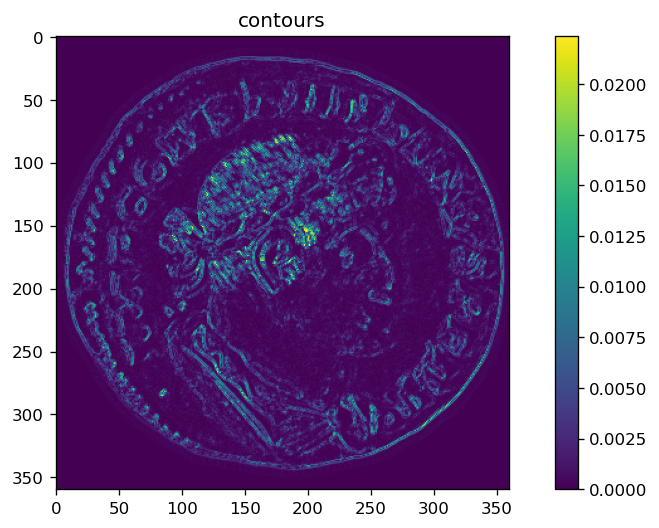

In [3]:
imgPath = "data/19_Droit.jpg"

#Utilisation de ImageProcessing
img =pr.cropToCoin(imgPath)
contours = pr.getContour(img)


plt.imshow(contours)
plt.colorbar()
plt.title("contours")
plt.show()

In [4]:
shape = np.shape(contours)
nbSide,b = shape

#Transformation en vecteur
weightVec = np.ravel(contours)



In [25]:
### Différentes valeurs de l

listeL = [1,4,8]
varMapList = []

for l in listeL:
    print("l:",l)
    ## Matrice de covariance
    Kw = k.getKw(weightVec,nbSide,l)
    ## Premier point d'interêt
    ext = f.Extractor(Kw)
    pi1 = ext.getIndexFirstFeature()
    ext.addFeature(pi1)
    ext.updateVarVect()
    varMapList.append(np.reshape(ext.varVect,shape)[100:200,150:250])

    

l: 1
K : occurence trouvée dans la base de donnée
l: 4
K : occurence trouvée dans la base de donnée
l: 8
K : occurence trouvée dans la base de donnée


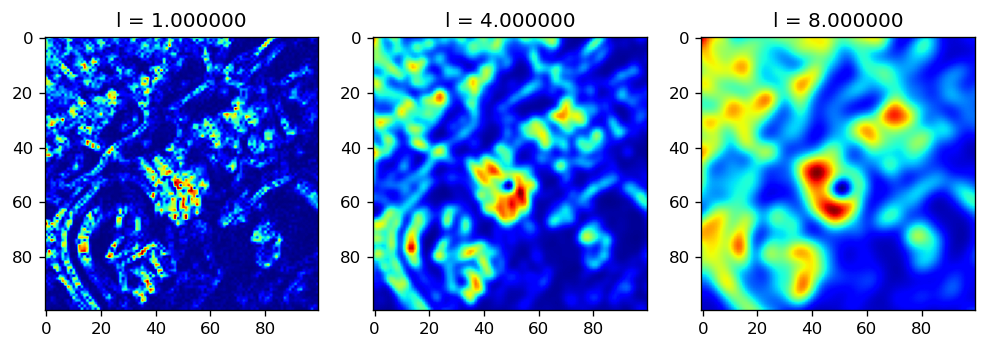

In [27]:
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.title("l = %f"%listeL[i])
    plt.imshow(varMapList[i],cmap='jet')

plt.show()

K : occurence trouvée dans la base de donnée


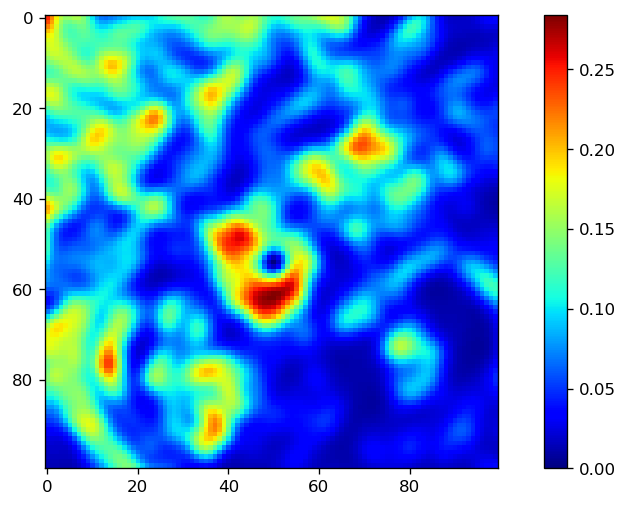

In [13]:
### pour l = 6

l=6

Kw = k.getKw(weightVec,nbSide,l)
## Premier point d'interêt
ext = f.Extractor(Kw)
pi1 = ext.getIndexFirstFeature()
ext.addFeature(pi1)
ext.updateVarVect()
varMap = np.reshape(ext.varVect,shape)[100:200,150:250]

plt.imshow(varMap,cmap="jet")
plt.colorbar()
plt.show()

In [5]:
### Affichage des points d'interêts


l=7

Kw = k.getKw(weightVec,nbSide,l)
## Premier point d'interêt
ext = f.Extractor(Kw)


K : occurence trouvée dans la base de donnée


In [6]:
coordPI= ext.getCoordNFeatures(100,nbSide)

In [7]:
varMap = np.reshape(ext.varVect,shape)

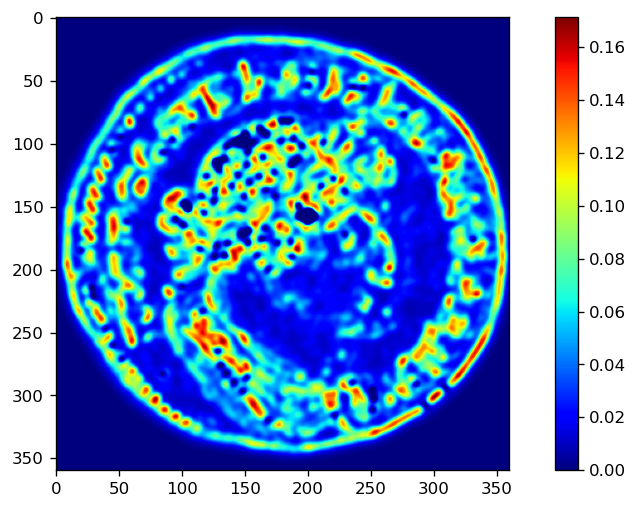

In [8]:
## Variances négatives
varMap[varMap<=0] = 0

plt.imshow(varMap,cmap='jet')
plt.colorbar()

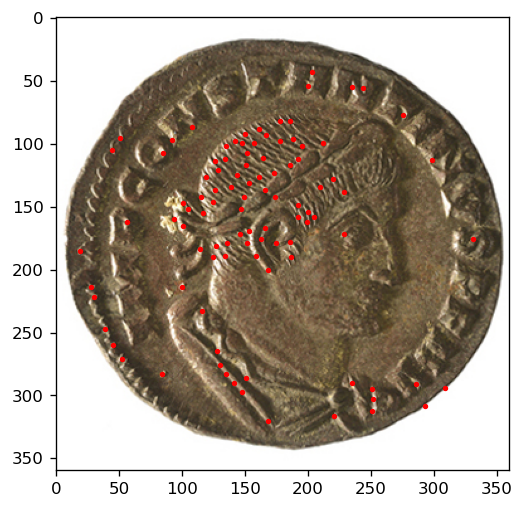

In [9]:
plt.imshow(img)

plt.scatter(coordPI[:,1],coordPI[:,0],color='r',s=5)